<a href="https://colab.research.google.com/github/Prasun1608/Computer-Vision-Projects/blob/main/Movie_Poster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Libraries and Data**

In [ ]:
import keras

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
%matplotlib inline 

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [ ]:
import io
train = pd.read_csv(io.BytesIO(uploaded['train.csv']))
# Dataset is now stored in a Pandas Dataframe

In [ ]:
train.head()

,Id,Genre,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,N/A,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,tt0086425,"['Comedy', 'Drama']",0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,tt0085549,"['Drama', 'Romance', 'Music']",0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,tt0086465,['Comedy'],0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,tt0086567,"['Sci-Fi', 'Thriller']",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,tt0086034,"['Action', 'Adventure', 'Thriller']",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
train.columns

Index(['Id', 'Genre', 'Action', 'Adventure', 'Animation', 'Biography',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
       'History', 'Horror', 'Music', 'Musical', 'Mystery', 'N/A', 'News',
       'Reality-TV', 'Romance', 'Sci-Fi', 'Short', 'Sport', 'Thriller', 'War',
       'Western'],
      dtype='object')

In [ ]:
train.shape

(7254, 27)

**Importing the Data**

In [ ]:
train_image = []
for i in tqdm(range(data.shape[0])):
    img = image.load_img('/content/drive/MyDrive/Images' + l[i],target_size=(400,400,3))
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
X = np.array(train_image)

100%|██████████| 100/100 [00:29<00:00,  3.43it/s]


In [ ]:
X.shape

(100, 400, 400, 3)

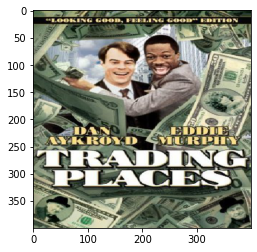

In [ ]:
plt.imshow(X[2])

In [ ]:
y = np.array(data.drop(['Id', 'Genre'],axis=1))
y.shape

(100, 25)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)

**Building the Model**

In [ ]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(400,400,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(25, activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), batch_size=1)

Epoch 1/100
90/90 [==============================] - 1s 11ms/step - loss: 0.2454 - accuracy: 0.2444 - val_loss: 0.2383 - val_accuracy: 0.0000e+00
Epoch 2/100
90/90 [==============================] - 1s 10ms/step - loss: 0.2422 - accuracy: 0.2889 - val_loss: 0.2409 - val_accuracy: 0.0000e+00
Epoch 3/100
90/90 [==============================] - 1s 10ms/step - loss: 0.2410 - accuracy: 0.1889 - val_loss: 0.2400 - val_accuracy: 0.0000e+00
Epoch 4/100
90/90 [==============================] - 1s 10ms/step - loss: 0.2361 - accuracy: 0.2222 - val_loss: 0.2434 - val_accuracy: 0.0000e+00
Epoch 5/100
90/90 [==============================] - 1s 10ms/step - loss: 0.2471 - accuracy: 0.2111 - val_loss: 0.2428 - val_accuracy: 0.0000e+00
Epoch 6/100
90/90 [==============================] - 1s 10ms/step - loss: 0.2389 - accuracy: 0.2444 - val_loss: 0.2441 - val_accuracy: 0.0000e+00
Epoch 7/100
90/90 [==============================] - 1s 10ms/step - loss: 0.2388 - accuracy: 0.2333 - val_loss: 0.2415 - val

**Making some predictions on GOT and Golmal posters**

In [ ]:
img = image.load_img('/content/drive/MyDrive/GOT.jpg' ,target_size=(400,400,3))
img = image.img_to_array(img)
img = img/255

Drama (0.482)
Comedy (0.358)
Romance (0.232)


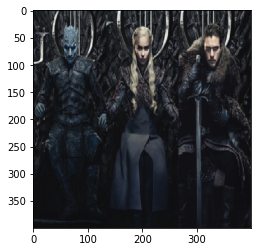

In [ ]:
classes = np.array(train.columns[2:])
proba = model.predict(img.reshape(1,400,400,3))
top_3 = np.argsort(proba[0])[:-4:-1]
for i in range(3):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
plt.imshow(img)

In [ ]:
img= image.load_img('/content/drive/MyDrive/golmal.jpeg', target_size=(400,400,3))
img= image.img_to_array(img)
img= img/255

Drama (0.482)
Comedy (0.358)
Romance (0.232)


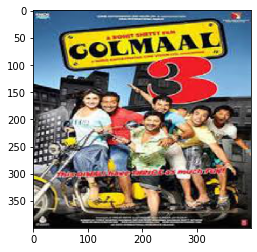

In [ ]:
classes= np.array(data.columns[2:])
proba= model.predict(img.reshape(1,400,400,3))
top3= np.argsort(proba[0])[:-4:-1]
for i in range(3):
  print('{}'.format(classes[top3[i]])+ ' ({:.3})'.format(proba[0][top3[i]]))

plt.imshow(img)

In [ ]:
proba[0][top3]

array([0.48186004, 0.35824722, 0.23237903], dtype=float32)